In [2]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


In [3]:
# read data into df
df = pd.read_csv("Credit_data.csv")
df.head()
df.describe()


ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  24000.000000    24000.000000  24000.000000  24000.000000  24000.000000   
mean   12000.500000   167876.403333      1.600917      1.850958      1.553000   
std     6928.347566   129907.454723      0.489720      0.787361      0.521331   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     6000.750000    50000.000000      1.000000      1.000000      1.000000   
50%    12000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    18000.250000   240000.000000      2.000000      2.000000      2.000000   
max    24000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_1         PAY_2         PAY_3         PAY_4  \
count  24000.000000  24000.000000  24000.000000  24000.000000  24000.000000   
mean      35.446708     -0.023875     -0.140500     -0.170000     -0.221500   
std        9.180845      1.123806      1.194216      1.198712      1.171784   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   24000.000000   24000.000000   24000.000000   24000.000000   
mean   ...   43172.528083   40190.249458   38722.892708    5687.489833   
std    ...   64075.909188   60385.391344   59259.183390   17011.021882   
min    ... -170000.000000  -53007.000000 -339603.000000       0.000000   
25%    ...    2294.000000    1718.500000    1238.000000    1000.000000   
50%    ...   19000.000000   18059.500000   16846.000000    2102.500000   
75%    ...   54837.250000   50320.000000   49327.500000    5011.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2       PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  2.400000e+04   24000.000000   24000.000000   24000.000000   
mean   5.928435e+03    5227.245458    4766.803417    4774.861792   
std    2.423232e+04   17918.982291   15421.988078   15400.224129   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    8.200000e+02     390.000000     285.000000     239.750000   
50%    2.013000e+03    1800.000000    1500.000000    1500.000000   
75%    5.000000e+03    4512.000000    4040.250000    4024.250000   
max    1.684259e+06  896040.000000  621000.000000  426529.000000   

            PAY_AMT6     default_0  
count   24000.000000  24000.000000  
mean     5280.923917      0.221083  
std     18214.205137      0.414985  
min         0.000000      0.000000  
25%       111.000000      0.000000  
50%      1500.000000      0.000000  
75%      4010.500000      0.000000  
max    528666.000000      1.000000  

[8 rows x 25 columns]

In [4]:
# basic model with all parameters as regressors except default
y=df[["default_0"]]
X=df.drop(columns=["default_0", "ID"])

In [5]:
# 60-20-20 train/validation/test split
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state = 657)

In [6]:
X_test, X_validation, y_test, y_validation = train_test_split(X_other, y_other, test_size=0.5, random_state = 343)

In [7]:
# Logistic Regression
classifier_LR = LogisticRegression(max_iter=2000)


In [8]:
classifier_LR.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=2000)

In [9]:
# Coefficients of the model
summary = pd.DataFrame([X_train.columns,classifier_LR.coef_[0]]).T.sort_values(by = 1, ascending = False)
summary.columns = ['Variable','Coefficient']
summary

Variable Coefficient
5       PAY_1    0.001146
6       PAY_2    0.000902
7       PAY_3     0.00082
8       PAY_4    0.000782
9       PAY_5    0.000728
10      PAY_6    0.000667
12  BILL_AMT2    0.000004
16  BILL_AMT6    0.000003
13  BILL_AMT3    0.000003
15  BILL_AMT5    0.000003
22   PAY_AMT6   -0.000001
14  BILL_AMT4   -0.000001
0   LIMIT_BAL   -0.000003
21   PAY_AMT5   -0.000006
11  BILL_AMT1   -0.000008
19   PAY_AMT3   -0.000011
20   PAY_AMT4   -0.000012
18   PAY_AMT2   -0.000022
17   PAY_AMT1   -0.000024
1         SEX   -0.000924
3    MARRIAGE   -0.000945
2   EDUCATION    -0.00115
4         AGE   -0.016497

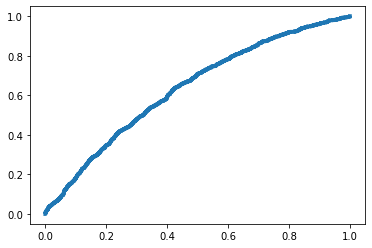

In [10]:
# Predict y on validation set at different thresholds
from matplotlib import pyplot
y_pred_prob = classifier_LR.predict_proba(X_validation)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_validation,y_pred_prob)
pyplot.plot(fpr, tpr, linewidth=4)
plt.show()

In [11]:
# ROC-AUC score of the model
metrics.roc_auc_score(y_validation, y_pred_prob)

0.6347537960491932

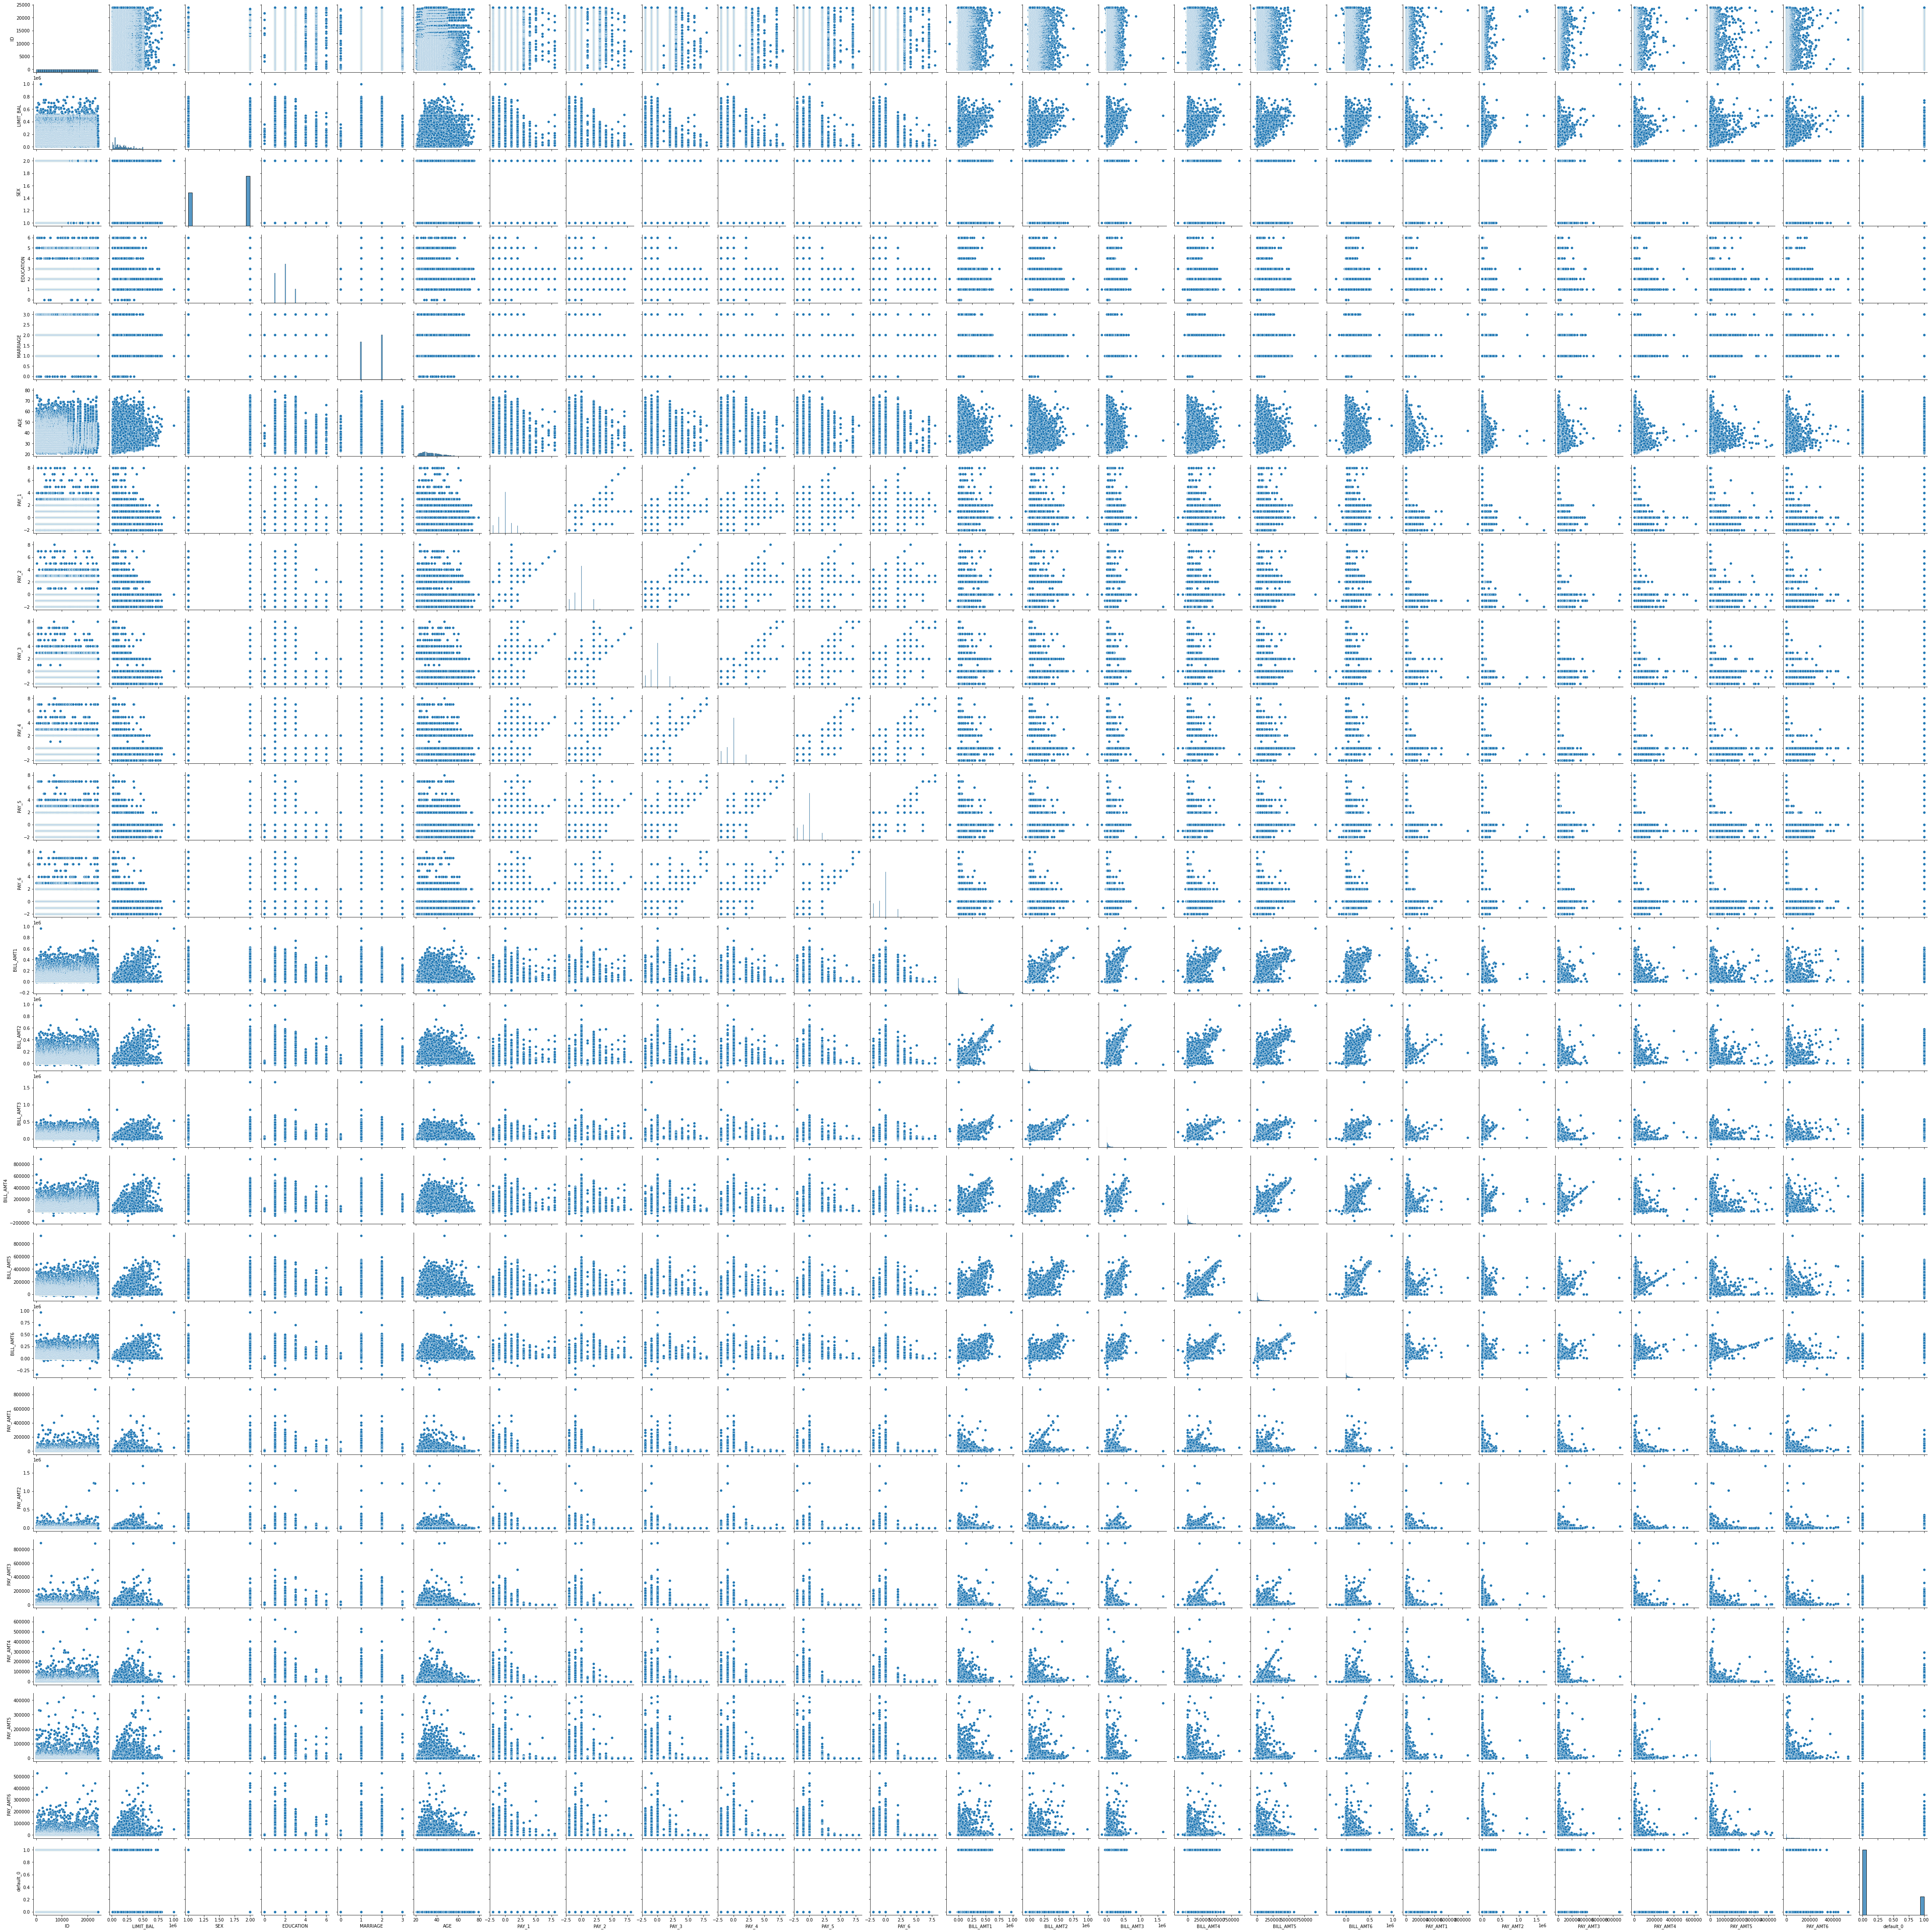

In [12]:
# EDA
# Check trends and correlation in the dataset
sns.pairplot(df)

In [13]:
df.corr()

ID  LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE  \
ID         1.000000   0.024071  0.018563   0.039702 -0.024306  0.016926   
LIMIT_BAL  0.024071   1.000000  0.021180  -0.218270 -0.101714  0.144507   
SEX        0.018563   0.021180  1.000000   0.012263 -0.026336 -0.101431   
EDUCATION  0.039702  -0.218270  0.012263   1.000000 -0.145358  0.176561   
MARRIAGE  -0.024306  -0.101714 -0.026336  -0.145358  1.000000 -0.416894   
AGE        0.016926   0.144507 -0.101431   0.176561 -0.416894  1.000000   
PAY_1     -0.024206  -0.268426 -0.055700   0.104571  0.019407 -0.042074   
PAY_2     -0.003334  -0.294676 -0.069304   0.119802  0.022402 -0.048828   
PAY_3     -0.012964  -0.284380 -0.068161   0.110544  0.033555 -0.052082   
PAY_4     -0.000423  -0.265448 -0.060089   0.106165  0.032382 -0.048990   
PAY_5     -0.019874  -0.247575 -0.053890   0.095527  0.036423 -0.057105   
PAY_6     -0.014592  -0.233043 -0.045049   0.078108  0.035385 -0.053873   
BILL_AMT1  0.025850   0.280714 -0.029638   0.023352 -0.022476  0.057860   
BILL_AMT2  0.023956   0.274099 -0.029080   0.016922 -0.019796  0.055817   
BILL_AMT3  0.028996   0.278666 -0.021676   0.011345 -0.023555  0.054577   
BILL_AMT4  0.045557   0.290353 -0.019951  -0.000030 -0.020691  0.052435   
BILL_AMT5  0.023100   0.290489 -0.013580  -0.008038 -0.024526  0.049805   
BILL_AMT6  0.022590   0.286108 -0.013299  -0.009181 -0.019138  0.047265   
PAY_AMT1   0.014663   0.193520  0.000644  -0.035289 -0.005835  0.026669   
PAY_AMT2   0.008746   0.173436  0.001298  -0.031329 -0.006871  0.022704   
PAY_AMT3   0.037264   0.205204 -0.010413  -0.040020 -0.001834  0.030798   
PAY_AMT4   0.011369   0.199620  0.000425  -0.041435 -0.012067  0.020158   
PAY_AMT5  -0.001051   0.218101 -0.000465  -0.040332 -0.000706  0.018961   
PAY_AMT6   0.001567   0.218140 -0.003797  -0.037872 -0.002401  0.022430   
default_0 -0.013163  -0.150709 -0.042947   0.026885 -0.024888  0.013450   

              PAY_1     PAY_2     PAY_3     PAY_4  ...  BILL_AMT4  BILL_AMT5  \
ID        -0.024206 -0.003334 -0.012964 -0.000423  ...   0.045557   0.023100   
LIMIT_BAL -0.268426 -0.294676 -0.284380 -0.265448  ...   0.290353   0.290489   
SEX       -0.055700 -0.069304 -0.068161 -0.060089  ...  -0.019951  -0.013580   
EDUCATION  0.104571  0.119802  0.110544  0.106165  ...  -0.000030  -0.008038   
MARRIAGE   0.019407  0.022402  0.033555  0.032382  ...  -0.020691  -0.024526   
AGE       -0.042074 -0.048828 -0.052082 -0.048990  ...   0.052435   0.049805   
PAY_1      1.000000  0.671551  0.571972  0.539503  ...   0.184385   0.185452   
PAY_2      0.671551  1.000000  0.765295  0.660569  ...   0.223473   0.222790   
PAY_3      0.571972  0.765295  1.000000  0.778626  ...   0.228636   0.226740   
PAY_4      0.539503  0.660569  0.778626  1.000000  ...   0.247250   0.244604   
PAY_5      0.510225  0.622181  0.687794  0.818549  ...   0.273299   0.271816   
PAY_6      0.472995  0.576507  0.634889  0.716921  ...   0.268077   0.294056   
BILL_AMT1  0.190826  0.235201  0.207607  0.202837  ...   0.862168   0.830750   
BILL_AMT2  0.192881  0.235162  0.236877  0.226135  ...   0.894234   0.861227   
BILL_AMT3  0.183251  0.223533  0.226833  0.245822  ...   0.922760   0.881058   
BILL_AMT4  0.184385  0.223473  0.228636  0.247250  ...   1.000000   0.939470   
BILL_AMT5  0.185452  0.222790  0.226740  0.244604  ...   0.939470   1.000000   
BILL_AMT6  0.181012  0.221099  0.224067  0.240982  ...   0.899059   0.945295   
PAY_AMT1  -0.077027 -0.079226  0.004302 -0.007009  ...   0.231003   0.216162   
PAY_AMT2  -0.064965 -0.057988 -0.063477 -0.002460  ...   0.198060   0.169914   
PAY_AMT3  -0.064386 -0.051197 -0.047507 -0.068376  ...   0.295443   0.250492   
PAY_AMT4  -0.066933 -0.047229 -0.046759 -0.043696  ...   0.125399   0.287830   
PAY_AMT5  -0.055933 -0.035467 -0.035829 -0.033070  ...   0.159408   0.139852   
PAY_AMT6  -0.055712 -0.033829 -0.034050 -0.026423  ...   0.183790   0.165296   
default_0  0.323410  0.259680  0.234374  0.216989  ...  -0.007834 

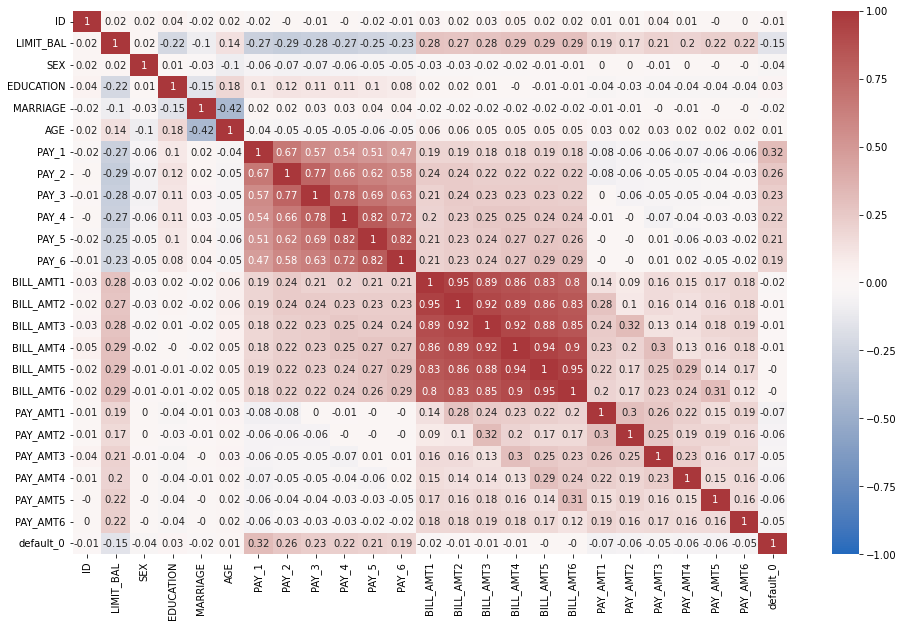

In [14]:
plt.figure(figsize=(16, 10))

heatmap = sns.heatmap(np.round(df.corr(),2), vmin=-1, vmax=1, annot=True, cmap="vlag")


<AxesSubplot:xlabel='default_0', ylabel='Count'>

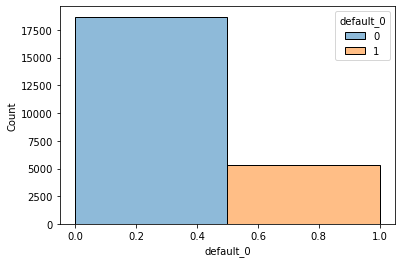

In [15]:
# Plot shows that the dataset is unbalanced
sns.histplot(data=df, x="default_0", hue="default_0", bins =2)


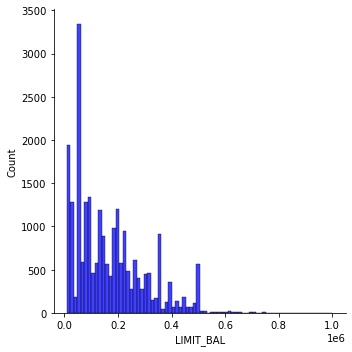

In [16]:
sns.displot(data=df, x="LIMIT_BAL", color='blue')

In [17]:
df.loc[df["MARRIAGE"]==0, "MARRIAGE"].count()

42

In [18]:
# Merge unknown education to a single label
print((df["EDUCATION"]==0 ).sum())
print((df["EDUCATION"]==5).sum())
print((df["EDUCATION"] ==6).sum())

df.loc[df["EDUCATION"]==5, "EDUCATION"] = 0
df.loc[df["EDUCATION"]==6, "EDUCATION"] = 0
df.info()

11
217
39
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         24000 non-null  int64  
 1   LIMIT_BAL  24000 non-null  int64  
 2   SEX        24000 non-null  int64  
 3   EDUCATION  24000 non-null  int64  
 4   MARRIAGE   24000 non-null  int64  
 5   AGE        24000 non-null  int64  
 6   PAY_1      24000 non-null  int64  
 7   PAY_2      24000 non-null  int64  
 8   PAY_3      24000 non-null  int64  
 9   PAY_4      24000 non-null  int64  
 10  PAY_5      24000 non-null  int64  
 11  PAY_6      24000 non-null  int64  
 12  BILL_AMT1  24000 non-null  float64
 13  BILL_AMT2  24000 non-null  float64
 14  BILL_AMT3  24000 non-null  float64
 15  BILL_AMT4  24000 non-null  float64
 16  BILL_AMT5  24000 non-null  float64
 17  BILL_AMT6  24000 non-null  float64
 18  PAY_AMT1   24000 non-null  float64
 19  PAY_AMT2   24000 non-null  float64
 

In [19]:
# One-hot encoding of categorical variables
df =pd.get_dummies(df,drop_first=True,columns=['EDUCATION', 'MARRIAGE', 'SEX', 'PAY_1'])

In [20]:
# For regressors:
# Drop ID, default_0
# Drop the other BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6 due to strong correlation with BILL_AMT1 
# Drop the other PAY_2, PAY_3, PAY_4, PAY_5, PAY_6 due to strong correlation with PAY_1

y=df[["default_0"]]
# X=df.drop(columns=["default_0", "ID", 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'])
X=df.drop(columns=["default_0", "ID", 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state = 657)
X_test, X_validation, y_test, y_validation = train_test_split(X_other, y_other, test_size=0.5, random_state = 234)

In [21]:
# Scale the numerical variables using Standardisation technique

from sklearn.preprocessing import StandardScaler
# numerical_columns = ['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
#        'PAY_6', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
#        'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

numerical_columns = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
       
scaler = StandardScaler()
scaler.fit(X_train[numerical_columns])
X_train[numerical_columns] = scaler.transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])
X_validation[numerical_columns] = scaler.transform(X_validation[numerical_columns])

In [22]:
# Choose model estimators and hyperparameters using gridsearch
# scoring metric is based on F1 score as the dataset is unbalanced, accuracy might not classify the minority class correctly 

classifier_LR = LogisticRegression(
    max_iter=2000,
    solver='liblinear')

parameters = {
    'penalty': ['l1', 'l2'],
    'C': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
    'class_weight': ['balanced', None]
}

clf = GridSearchCV(classifier_LR, parameters, scoring="f1", cv=5)
clf.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=2000, solver='liblinear'),
             param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             scoring='f1')

In [23]:
print(clf.best_params_)

{'C': 100, 'class_weight': 'balanced', 'penalty': 'l2'}


In [24]:
# Model based on best parameters

classifier_LR = LogisticRegression(
    max_iter=2000,
    penalty='l2',
    solver='liblinear',
    C=100, class_weight='balanced')

classifier_LR.fit(X_train, y_train.values.ravel())

LogisticRegression(C=100, class_weight='balanced', max_iter=2000,
                   solver='liblinear')

In [25]:
# Coefficients of the model
summary = pd.DataFrame([X_train.columns,classifier_LR.coef_[0]]).T.sort_values(by = 1, ascending = False)
summary.columns = ['Variable','Coefficient']
summary

Variable Coefficient
26      PAY_1_8     2.49487
21      PAY_1_3    2.209469
20      PAY_1_2     2.16005
15   MARRIAGE_3    1.953577
22      PAY_1_4    1.801654
13   MARRIAGE_1    1.789839
14   MARRIAGE_2    1.642097
23      PAY_1_5    1.464736
25      PAY_1_7    1.413915
10  EDUCATION_2     1.20236
24      PAY_1_6     1.17125
9   EDUCATION_1    1.150295
11  EDUCATION_3    1.093734
19      PAY_1_1    0.775557
2     BILL_AMT1    0.160501
17     PAY_1_-1    0.127225
1           AGE    0.027141
8      PAY_AMT6   -0.021114
7      PAY_AMT5   -0.032693
6      PAY_AMT4   -0.085658
3      PAY_AMT1    -0.08993
5      PAY_AMT3   -0.136321
16        SEX_2   -0.179578
4      PAY_AMT2   -0.211838
0     LIMIT_BAL   -0.321051
18      PAY_1_0   -0.541439
12  EDUCATION_4   -1.049561

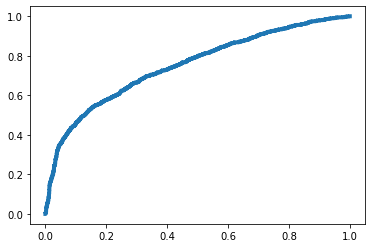

In [26]:
# Predict y based on x validation dataset at different thresholds and AUC-ROC curve
from matplotlib import pyplot
y_pred_prob = classifier_LR.predict_proba(X_validation)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_validation,y_pred_prob)
pyplot.plot(fpr, tpr, linewidth=4)
plt.show()

In [27]:
# AUC_ROC score of the model
metrics.roc_auc_score(y_validation, y_pred_prob)

0.750182464869088

In [28]:
# Choose the best threshold based on Youden's J Statistic
J = tpr - fpr
print("The best threshold according to the J statistic is " + str(thresholds[np.argmax(J)]))

The best threshold according to the J statistic is 0.5266481580291658


In [29]:
# Confusion matrix based on the threshold
threshold = thresholds[np.argmax(J)]
y_validation_pred = np.where(y_pred_prob < threshold, 0, 1)
metrics.confusion_matrix(y_validation, y_validation_pred)

array([[3133,  598],
       [ 485,  584]], dtype=int64)

In [30]:
# Accuracy and F score - Choose this as final model as the metrics look good enough
print(metrics.accuracy_score(y_validation,y_validation_pred))
print(metrics.f1_score(y_validation,y_validation_pred))

0.774375
0.5188804975566415


### Final - combine train and validation and predict on test

In [31]:
X_end=X_train.append(X_validation)
y_end=y_train.append(y_validation)

classifier_LR.fit(X_end, y_end.values.ravel())

C:\Users\Soumya\AppData\Local\Temp\ipykernel_28228\2961311467.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_end=X_train.append(X_validation)
C:\Users\Soumya\AppData\Local\Temp\ipykernel_28228\2961311467.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_end=y_train.append(y_validation)


LogisticRegression(C=100, class_weight='balanced', max_iter=2000,
                   solver='liblinear')

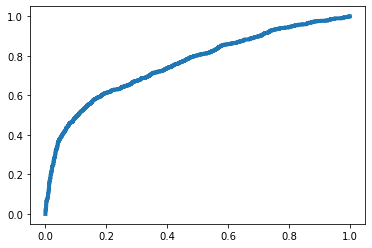

In [32]:
from matplotlib import pyplot
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_prob)
pyplot.plot(fpr, tpr, linewidth=4)
plt.show()

In [33]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.759592909799548

In [34]:
y_test_pred = np.where(y_pred_prob < threshold, 0, 1)
metrics.confusion_matrix(y_test, y_test_pred)

array([[3154,  609],
       [ 436,  601]], dtype=int64)

In [35]:
print(metrics.accuracy_score(y_test,y_test_pred))
print(metrics.f1_score(y_test,y_test_pred))

0.7822916666666667
0.5349354695149088


### Predict on new data

In [36]:
# Load new data and remove the extra column not needed
df_new = pd.read_csv("New_applications.csv")
df_new.drop('Unnamed: 24', axis=1, inplace=True)
df_new.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [37]:

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   object 
 1   LIMIT_BAL  1000 non-null   int64  
 2   SEX        1000 non-null   int64  
 3   EDUCATION  1000 non-null   int64  
 4   MARRIAGE   1000 non-null   int64  
 5   AGE        1000 non-null   int64  
 6   PAY_1      1000 non-null   int64  
 7   PAY_2      1000 non-null   int64  
 8   PAY_3      1000 non-null   int64  
 9   PAY_4      1000 non-null   int64  
 10  PAY_5      1000 non-null   int64  
 11  PAY_6      1000 non-null   int64  
 12  BILL_AMT1  1000 non-null   int64  
 13  BILL_AMT2  1000 non-null   int64  
 14  BILL_AMT3  1000 non-null   int64  
 15  BILL_AMT4  1000 non-null   int64  
 16  BILL_AMT5  1000 non-null   int64  
 17  BILL_AMT6  1000 non-null   int64  
 18  PAY_AMT1   1000 non-null   float64
 19  PAY_AMT2   1000 non-null   float64
 20  PAY_AMT3 

In [38]:
# Feature engineer all the features used in the Credit_data dataset
df_new.loc[df_new["EDUCATION"]==5, "EDUCATION"] = 0
df_new.loc[df_new["EDUCATION"]==6, "EDUCATION"] = 0
df_new =pd.get_dummies(df_new,drop_first=True,columns=['EDUCATION', 'MARRIAGE', 'SEX', 'PAY_1'])
X1=df_new.drop(columns=[ "ID", 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])
X1[numerical_columns] = scaler.transform(X1[numerical_columns])
X2 = df_new["ID"]



In [39]:
# print(df_new.columns)
# print(df.columns)
X1.head()

LIMIT_BAL       AGE  BILL_AMT1  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0   2.551872 -0.700834   4.304567  2.786529  1.730247  1.734066  0.963408   
1   0.319998 -0.700834  -0.691735 -0.320462 -0.289077 -0.278731 -0.299374   
2  -0.141769 -0.918057   0.476112 -0.092748  0.216057 -0.105737 -0.047304   
3  -1.142264  0.276674  -0.447694 -0.224484 -0.215372 -0.245573 -0.190185   
4   1.782261 -0.157774  -0.424788  0.226199  0.310006  0.136487  0.626358   

   PAY_AMT5  PAY_AMT6  EDUCATION_1  ...  SEX_2  PAY_1_-1  PAY_1_0  PAY_1_1  \
0  0.573732  0.460325            1  ...      0         0        1        0   
1 -0.308149 -0.291303            1  ...      0         0        0        0   
2 -0.199244 -0.247636            1  ...      0         0        1        0   
3 -0.298528 -0.291303            0  ...      0         0        1        0   
4  0.202316  0.020483            0  ...      0         1        0        0   

   PAY_1_2  PAY_1_3  PAY_1_4  PAY_1_5  PAY_1_7  PAY_1_8  
0        0        0        0        0        0        0  
1        0        0        0        0        0        0  
2        0        0        0        0        0        0  
3        0        0        0        0        0        0  
4        0        0        0        0        0        0  

[5 rows x 26 columns]

In [40]:
#  There is no PAY_1_6 column in the new dataset, so add a new column for it with the value as 0

X1['PAY_1_6'] = 0
# X1['PAY_1_6'].astype(np.uint8, inplace=True)
X1.head()


LIMIT_BAL       AGE  BILL_AMT1  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0   2.551872 -0.700834   4.304567  2.786529  1.730247  1.734066  0.963408   
1   0.319998 -0.700834  -0.691735 -0.320462 -0.289077 -0.278731 -0.299374   
2  -0.141769 -0.918057   0.476112 -0.092748  0.216057 -0.105737 -0.047304   
3  -1.142264  0.276674  -0.447694 -0.224484 -0.215372 -0.245573 -0.190185   
4   1.782261 -0.157774  -0.424788  0.226199  0.310006  0.136487  0.626358   

   PAY_AMT5  PAY_AMT6  EDUCATION_1  ...  PAY_1_-1  PAY_1_0  PAY_1_1  PAY_1_2  \
0  0.573732  0.460325            1  ...         0        1        0        0   
1 -0.308149 -0.291303            1  ...         0        0        0        0   
2 -0.199244 -0.247636            1  ...         0        1        0        0   
3 -0.298528 -0.291303            0  ...         0        1        0        0   
4  0.202316  0.020483            0  ...         1        0        0        0   

   PAY_1_3  PAY_1_4  PAY_1_5  PAY_1_7  PAY_1_8  PAY_1_6  
0        0        0        0        0        0        0  
1        0        0        0        0        0        0  
2        0        0        0        0        0        0  
3        0        0        0        0        0        0  
4        0        0        0        0        0        0  

[5 rows x 27 columns]

In [41]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LIMIT_BAL    1000 non-null   float64
 1   AGE          1000 non-null   float64
 2   BILL_AMT1    1000 non-null   float64
 3   PAY_AMT1     1000 non-null   float64
 4   PAY_AMT2     1000 non-null   float64
 5   PAY_AMT3     1000 non-null   float64
 6   PAY_AMT4     1000 non-null   float64
 7   PAY_AMT5     1000 non-null   float64
 8   PAY_AMT6     1000 non-null   float64
 9   EDUCATION_1  1000 non-null   uint8  
 10  EDUCATION_2  1000 non-null   uint8  
 11  EDUCATION_3  1000 non-null   uint8  
 12  EDUCATION_4  1000 non-null   uint8  
 13  MARRIAGE_1   1000 non-null   uint8  
 14  MARRIAGE_2   1000 non-null   uint8  
 15  MARRIAGE_3   1000 non-null   uint8  
 16  SEX_2        1000 non-null   uint8  
 17  PAY_1_-1     1000 non-null   uint8  
 18  PAY_1_0      1000 non-null   uint8  
 19  PAY_1_1

In [42]:
X1 = X1.astype({'PAY_1_6': 'uint8'})


In [43]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LIMIT_BAL    1000 non-null   float64
 1   AGE          1000 non-null   float64
 2   BILL_AMT1    1000 non-null   float64
 3   PAY_AMT1     1000 non-null   float64
 4   PAY_AMT2     1000 non-null   float64
 5   PAY_AMT3     1000 non-null   float64
 6   PAY_AMT4     1000 non-null   float64
 7   PAY_AMT5     1000 non-null   float64
 8   PAY_AMT6     1000 non-null   float64
 9   EDUCATION_1  1000 non-null   uint8  
 10  EDUCATION_2  1000 non-null   uint8  
 11  EDUCATION_3  1000 non-null   uint8  
 12  EDUCATION_4  1000 non-null   uint8  
 13  MARRIAGE_1   1000 non-null   uint8  
 14  MARRIAGE_2   1000 non-null   uint8  
 15  MARRIAGE_3   1000 non-null   uint8  
 16  SEX_2        1000 non-null   uint8  
 17  PAY_1_-1     1000 non-null   uint8  
 18  PAY_1_0      1000 non-null   uint8  
 19  PAY_1_1

In [44]:
# Predict the default probability of the 1000 customers in the new dataset using the final model
# here whoever has a default is not given credit and vice versa
y1_pred_prob = classifier_LR.predict_proba(X1)[:,1]
y1_pred = np.where(y1_pred_prob < threshold, 0, 1)
credit_pred= np.where(y1_pred_prob < threshold, 1, 0)
series1 = pd.Series(y1_pred_prob) 
series2 = pd.Series(credit_pred) 
series3= pd.Series(y1_pred)
mo = pd.DataFrame(dict(ID = X2, CreditIssue = series2, Defaultprob = series1, ThresholdDefaultprob = series3)).reset_index()




c:\Users\Soumya\anaconda3\Anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [45]:
# save file with credit column added 
mo.to_csv("Data.csv", index=False)


In [46]:
mo.head(10)

index        ID  CreditIssue  Defaultprob  ThresholdDefaultprob
0      0   n1000-1            1     0.126161                     0
1      1   n1000-2            1     0.424270                     0
2      2   n1000-3            1     0.331301                     0
3      3   n1000-4            1     0.469023                     0
4      4   n1000-5            1     0.327386                     0
5      5   n1000-6            0     0.605440                     1
6      6   n1000-7            0     0.604633                     1
7      7   n1000-8            1     0.346144                     0
8      8   n1000-9            0     0.916718                     1
9      9  n1000-10            1     0.377821                     0

In [54]:
# Pick three employees who will more/ less likely to return the credit based on actual default probability without threshold
f_df = mo.loc[mo["CreditIssue"]==1]
final_df = f_df.sort_values(by=['Defaultprob'], ascending=True)
# more likely to pay employees
final_df.head(3)


index         ID  CreditIssue  Defaultprob  ThresholdDefaultprob
673    673  n1000-674            1     0.009923                     0
760    760  n1000-761            1     0.025107                     0
49      49   n1000-50            1     0.026755                     0

In [55]:
# less likely to pay employees
final_df.tail(3)

index         ID  CreditIssue  Defaultprob  ThresholdDefaultprob
520    520  n1000-521            1     0.523508                     0
72      72   n1000-73            1     0.524436                     0
146    146  n1000-147            1     0.524477                     0